This is a simple regression exmaple to find out if there is a relationship between salinity and temperature of ocean water. This is a CalCOFI( California Cooperative Oceanic Fisheries Investigations) dataset with Over 60 years of oceanographic data, taken from: https://www.kaggle.com/sohier/calcofi?select=bottle.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bottle.csv')
#print no of rows and columns
nRow,nCol = data.shape
print("No of rows= " ,nRow ,"No of Columns= " , nCol)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


No of rows=  864863 No of Columns=  74


In [3]:
data.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

## Choose the columns to perform regression

In [5]:
ind_y = data.columns.get_loc('Salnty')
ind_x = data.columns.get_loc('T_degC')
print(ind_x,ind_y)

5 6


In [6]:
X= data.iloc[:1000,ind_x:ind_x+1].values #independent variable as a 2D matrix
y= data.iloc[:1000,ind_y].values #dependent variable

In [7]:
print(X[:10,:])

[[10.5 ]
 [10.46]
 [10.46]
 [10.45]
 [10.45]
 [10.45]
 [10.45]
 [10.24]
 [10.06]
 [ 9.86]]


## Data Preprocessing

In [8]:
# check for missing data and replace with mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

yDash = y.reshape(-1,1)
imputer.fit(yDash)
yDash = imputer.transform(yDash)
y = yDash.ravel()

## Split train and test set 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()

#train the model
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
#predict the test data. y_pred contains predicted salaries 
y_pred = regressor.predict(X_test)

In [12]:
#predict training set results for visualisation
yt_pred = regressor.predict(X_train)

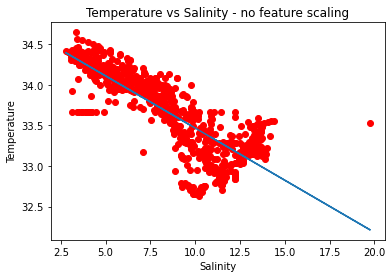

In [13]:
#create a scatter plot of real data
plt.scatter(X_train,y_train,color='red')

#plot the line of best fit/ regression line 
plt.plot(X_train,yt_pred)

#give the plot a title
plt.title('Temperature vs Salinity - no feature scaling')

#add labels to axes
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

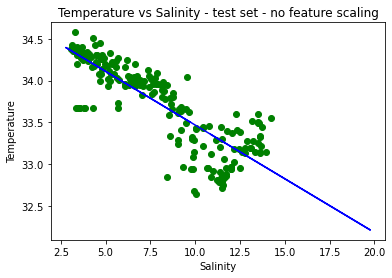

In [14]:
#create a scatter plot of test data
plt.scatter(X_test,y_test,color='green')

#plot the line of best fit/ regression line 
#X_train is used to create the regression line and we want to compare our test results with that. 
plt.plot(X_train,yt_pred,color='blue')

#give the plot a title
plt.title('Temperature vs Salinity - test set - no feature scaling')

#add labels to axes
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

In [15]:
#y = b0 +b1x1 

#get the b1 = slope of the eqn / coefficient 
b1= regressor.coef_

#get b0 = intercept in y axis 
b0= regressor.intercept_
print("Equation: Temp = ",b0 ," + ",b1," * ","salinity")

Equation: Temp =  34.75495128214517  +  [-0.12873589]  *  salinity


# with feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

sc2= StandardScaler()
y_train = sc2.fit_transform(y_train.reshape(-1,1)).ravel()
y_test = sc2.transform(y_test.reshape(-1,1)).ravel()

In [18]:
reg2= LinearRegression()

#train the model
reg2.fit(X_train,y_train)

LinearRegression()

In [19]:
#predict the test data. y_pred contains predicted salaries 
y_pred2 = sc2.inverse_transform(reg2.predict(X_test))

#predict training set results for visualisation
yt_pred2 = sc2.inverse_transform(reg2.predict(X_train))

In [20]:
X_test = sc.inverse_transform(X_test)
X_train = sc.inverse_transform(X_train)
y_test = sc2.inverse_transform(y_test)
y_train = sc2.inverse_transform(y_train)


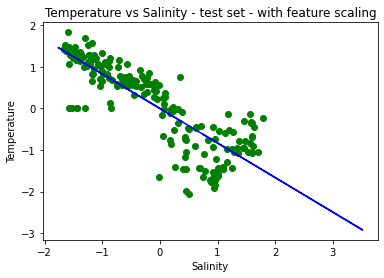

In [21]:
#create a scatter plot of test data
plt.scatter(X_test,y_test,color='green')

#plot the line of best fit/ regression line 
#X_train is used to create the regression line and we want to compare our test results with that. 
plt.plot(X_train,yt_pred2,color='blue')

#give the plot a title
plt.title('Temperature vs Salinity - test set - with feature scaling')

#add labels to axes
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1076.034806848355

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.6872087425795353